In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io 
from scipy import fftpack

**Task A**: Fourier Transform of Images: we compare the Fourier transform of two different images. 
The following functions can be used to compute a Fourier transform of a given image. Note that low frequencies are shifted to the center of the transformed image.  

In [2]:
def fourier_transform(img):
    f = np.fft.fft2(img)
    # shift the zero-frequency component to the center of the spectrum
    fshift = np.fft.fftshift(f)
    return fshift

def inverse_fourier_transform(f):
    # shift the zero-frequency component back to the original place
    f = np.fft.fftshift(f)
    img = abs(np.fft.ifft2(f))
    return img

def get_fourier_magnitude_spectrum(img):
    f = fourier_transform(img)
    magnitude_spectrum = 20*np.log(np.abs(f))
    return magnitude_spectrum

def plot_img(img):
    plt.imshow(img, cmap='gray')
    
def plot_img_with_fourier_spectrum(img, fourier_magnitude_spectrum):
    plt.subplot(121)
    plot_img(img)
    plt.subplot(122)
    plot_img(fourier_magnitude_spectrum)

Here we plot the magnitude spectrum of two different images. Answer the following questions: 
<ul>
  <li>What is the difference between these two spectrums?</li>
  <li>What is the source of this difference in spectrums?</li>
</ul>

Solutions:
<ul>
  <li>The high-frequency region of the spectrum of the barbara image is brighter than that of boat image, which means that the barbara image contains more high-frequency components than the boat image. </li>
  <li>The source of the high-frequency component in the barbara image comes from the stripes pattern on the women's clothes as well as the check pattern on the table cloth. </li>
</ul>



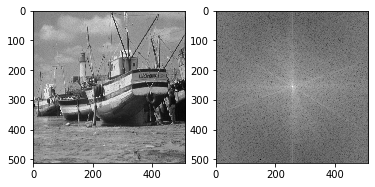

In [3]:
img_boat = io.imread("boat.png")
f_boat = get_fourier_magnitude_spectrum(img_boat)
plot_img_with_fourier_spectrum(img_boat, f_boat)

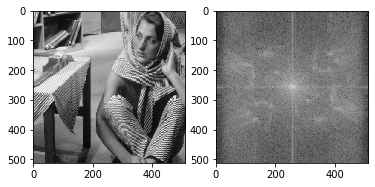

In [4]:
img_barbara = io.imread("barbara.png")
f_barbara = get_fourier_magnitude_spectrum(img_barbara)
plot_img_with_fourier_spectrum(img_barbara, f_barbara)

The following function constructs a mask that you'll need for the next exercises.

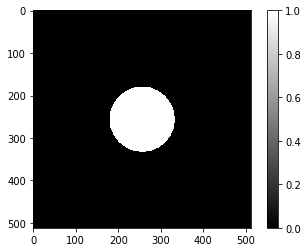

In [5]:
def get_mask(nrows, ncols, keep_frac=0.1):
    row, col = np.ogrid[:nrows, :ncols]
    cnt_row, cnt_col = nrows / 2, ncols / 2
    radius = np.sqrt(keep_frac*nrows*ncols/np.pi)
    outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 < radius ** 2)
    return outer_disk_mask.astype(float)

mask = get_mask(*img_boat.shape, keep_frac=0.07)
plot_img(mask)
plt.colorbar()

**Task B**: Use the shifted fourier spectrum together with the above mask to implement a lowpass filtering. The steps to accomplish this task are as follows. First,  apply the filter (=mask) to the spectrum. Then, use the inverse fourier transform to reconstruc the image.

Compare both images to their reconstructed version.

For which is the reconstruction closer to the original version? Why?

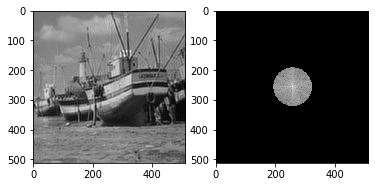

In [6]:
#solution boat
mask = get_mask(*img_boat.shape, keep_frac=0.05)
f_transform_boat = fourier_transform(img_boat)
f_transform_boat_masked = f_transform_boat * mask
img_boat_rec = inverse_fourier_transform(f_transform_boat_masked)

plot_img_with_fourier_spectrum(img_boat_rec, get_fourier_magnitude_spectrum(img_boat)*mask)


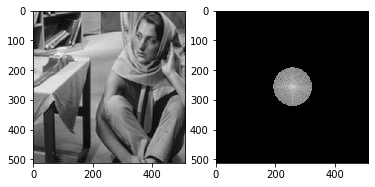

In [7]:
#solution barbara
mask = get_mask(*img_barbara.shape, keep_frac=0.05)
f_transform_barbara = fourier_transform(img_barbara)
f_transform_barbara_masked = f_transform_barbara * mask
img_barbara_rec = inverse_fourier_transform(f_transform_barbara_masked)

plot_img_with_fourier_spectrum(img_barbara_rec, get_fourier_magnitude_spectrum(img_barbara)*mask)

Solutions: 
<ul>
  <li>The lowpass-filtered boat image is more similar to the original image. Because most of information of the boat image are in the low-frequency region as can be observed from its spectrum and the low-pass filtering filter out the high-frequency component, so more information is kept for the boat image than the barbara image after low-pass filtering hence more similar to the original one. (As can be seen, the patterns corresponding to the high-frequency components disappear after low-pass filtering in the babara image.) </li>
  <li>The low-pass filtering can be used as a sparse coding technique for the boat image. Sparse coding preserves the components with the largest coefficient values. In the boat image, the low-frequency components are the ones with higher coefficients and they are preserved after low-pass filtering; whereas in the barbara image, some high-frequency compoents also have large coefficient values which are not preserved after low-pass filtering but should be kept with sparse coding technique. In that sense, the low-pass filtering is more similar to the sparse coding technique for the boat image. </li>
</ul>

**BONUS TASK!**
What is the difference between DCT and FFT?!

In [8]:
def get_dct_spectrum(img): 
    plt.subplot(121), plt.imshow(img,cmap='gray')
    f= fftpack.dct(fftpack.dct(img.T, norm='ortho').T, norm='ortho')
    magnitude_spectrum = 20*np.log(np.abs(f)) # compute the magnitude spectrum of the fourier spectrum
    plt.subplot(122), plt.imshow(magnitude_spectrum)
    plt.colorbar()
    return f

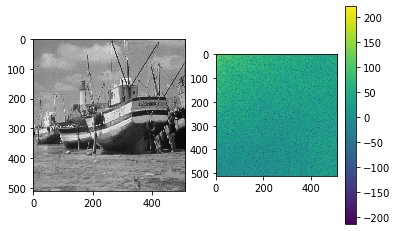

In [9]:
fshift_boat = get_dct_spectrum(img_boat)

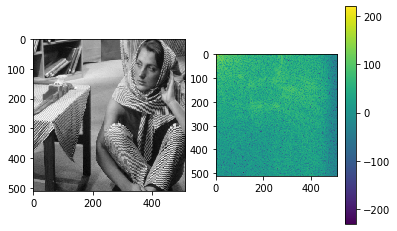

In [10]:
fshift_barbar = get_dct_spectrum(img_barbara)

So, what's the difference? Not much! Though in general one experiences "the energy compaction" phenomenon in DCT: that's why it is used for image compression


Nice websites for understanding (just for your interest)

http://bugra.github.io/work/notes/2014-07-12/discre-fourier-cosine-transform-dft-dct-image-compression/

http://www.svcl.ucsd.edu/courses/ece161c/handouts/DCT.pdf